# Homework 2

This assignment requires you to build and test a Naive Bayes model of product reviews using Python's scikit-learn package. 

The dataset is provided with the homework and contains six of the review topics used in the paper <i>John Blitzer, Mark Dredze, and Fernando Pereira: Biographies, Bollywood, Boom-boxes and Blenders: Domain Adaptation for Sentiment Classification. In Proceedings of the 45th Annual Meeting of the Association of Computational Linguistics (ACL 2007).</i> The data has been formatted so that there is one review per line, and the texts have been tokenized and normalized. 

A line in the file is organized in columns as follows:

0: <b> topic</b> category label (books, camera, dvd, health, music, or software) <br>
1: <b>sentiment</b> category label (pos or neg) <br>
2: document identifier <br>
3 and on: the actual review  <br>
    
    
Here is an example of a line:

<b>health pos 691.txt</b> <i>smaller size did not fit me or my son . it would be nice if you could use perhaps a hat size to determine right size . standard size worked fine . </i>

IMPORTANT: Your submission must be a Jupyter Notebook (.ipynb) file that is organized into sections as in this notebook file. You may choose to edit this file to insert your answers and submit the resulting file.


## Part I  - 10 Points

Write a function named <i>read_corpus</i> that takes a filename for the dataset and the position of the category label on each line and returns the reviews and labels as two separate lists. Invoke your function with the filename of the dataset provided with this assignment and 1 as the position of the category label (sentiment), save the results in variables, and then print out the folowing:
 
 (1) any two reviews and their corresponding labels <br>
 (2) number of reviews (reviews will be referred to as data in the rest of the assignment) <br> 
 (3) number of labels

**Import statements**

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, f1_score
import string
%matplotlib inline


In [2]:
# PART I: extract data and labels 
def read_corpus(filename, category_position):
    ## fill in your code below this line
    
    all_data = []
    all_labels = []
    with open(filename, encoding='utf8') as f:
        for line in f:
            tokens = line.strip().split()
            data = tokens[3:]
            label = tokens[category_position]
            all_data.append(' '.join(data))
            all_labels.append(label)
    
    
    
    return all_data, all_labels

In [1]:
# code for 
#(1) invoking the read_corpus function
path = "../data/HW2_data/all_reviews.txt"
all_data, all_labels = read_corpus(path, category_position=1)
print("REVIEW #0: ")
print("LABEL: ", all_labels[0])
print("DATA: ", all_data[0])

print("REVIEW #2: ")
print("LABEL: ", all_labels[2])
print("DATA: ", all_data[2])


print("# REVIEWS IN CORPUS:", len(all_data))
print("# LABELS IN CORPUS ", len((all_labels)))
print("# UNIQUE LABELS IN CORPUS: ", len(set(all_labels)))


NameError: name 'read_corpus' is not defined

## Part II - 20 Points

Write a function called <i>split_data</i> that takes the following as parameters: 

(1) data <br>
(2) labels <br>
(3) a split point which is a number between 0 and 1 (say, 0.8)  <br>


The function should split the data into two sets <i>train_data</i> and <i>test_data</i> based on the split point. For instance, if the split point is 0.8, then <i>train_data</i> should be 80% of the data (selection should start from the beginning) and <i>test_dat</i>a should be the rest (20%) of the data. The labels should be split in a similar fashion. 

The function should return 4 lists as follows:

(1) train_data <br>
(2) test_data <br>
(3) train_labels <br>
(4) test_labels <br>

In [4]:
# PART II: code for function split_data
def split_data(all_data, all_labels, split_point):
    #put your code below this line
    data_split_idx = int(split_point*len(all_data))
    labels_split_idx = int(split_point*len(all_labels))
    train_data,test_data = all_data[:data_split_idx], all_data[data_split_idx:]
    train_labels, test_labels = all_labels[:labels_split_idx], all_labels[labels_split_idx:]

    return train_data, test_data, train_labels, test_labels

In [5]:
train_data, test_data, train_labels, test_labels = split_data(all_data, all_labels, .8)

print(train_data[0], '\n')
print(train_labels[0], '\n')

print('# REVIEWS IN TRAINING DATA:', len(train_data))
print('# LABELS IN TRAINING DATA:', len(train_labels))

print('\n')

print(test_data[0], '\n')
print(test_labels[0], '\n')

print('# REVIEWS IN TEST DATA:', len(test_data))
print('# LABELS IN TEST DATA:', len(test_labels))

i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things . 

neg 

# REVIEWS IN TRAINING DATA: 9531
# LABELS IN TRAINING DATA: 9531


do not buy this iron . it 's fabulous while it works , for which it does merit the one star . but it 

## Part III - 20 points

Using the MultinomialNB module from scikit-learn package (see sample code in NaiveBayes.ipynb on Canvas under Text Classification), build a model and predict the labels for the test_data. 

In [6]:
# PART III: put your code after this line and run the cell(s). 
# You may use multiple cells
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data, train_labels)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [7]:
labels = model.predict(test_data)

## Part IV - 20 points

Generate and display the confusion matrix of your model as a heatmap plot. 

Text(21.5, 0.5, 'predicted label')

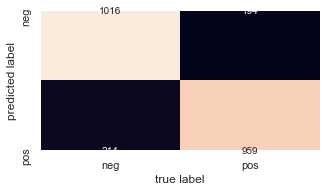

In [8]:
mat = confusion_matrix(test_labels, labels)
plt.figure(figsize=(5,5))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(train_labels), yticklabels=np.unique(train_labels))

plt.xlabel('true label'); plt.ylabel('predicted label')

### The numbers are cut-off due to a heatmap glitch so I have printed the matrix here

In [9]:
mat.T

array([[1016,  194],
       [ 214,  959]])

## Part V - 10 points

Using modules from scikit-learn, compute and display the microaveraged and macroaveraged F1 scores for your predictions (this was not provided in the sample code, so you will have to figure this out by searching online). 

In [10]:
# PART V: put your code after this line and run the cell to display the scores
print('Microaveraged F1 score:', f1_score(test_labels, labels, average='micro'))
print('Macroaveraged F1 score:', f1_score(test_labels, labels, average='macro'))


Microaveraged F1 score: 0.8287872429710449
Macroaveraged F1 score: 0.8286892293813344


## Part VI - 20 points

Repeat Parts I - V  for the topic category label  (books, camera, dvd, health, music, or software) in the dataset. Insert cells after this cell to show your code and output. You must invoke some of the functions you have defined in the earlier parts of this assignment to avoid repeating all of the code.

In [11]:
all_data_v2, all_labels_v2 = read_corpus(path, category_position=0) #Now use index 0 instead of 1


print(all_data_v2[:2], '\n')
print(all_labels_v2[:2], '\n')

print('TOTAL # OF REVIEWS:', len(all_data_v2))
print('TOTAL # OF LABELS:', len(all_labels_v2))

["i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things .", 'i was misled and thought i was buying the entire cd and it contains one song'] 

['music', 'music'] 

TOTAL # OF REVIEWS: 11914
TOTAL # OF LABELS: 11914


In [12]:
train_data_v2, test_data_v2, train_labels_v2, test_labels_v2 = split_data(all_data_v2, all_labels_v2, .8)

print(train_data_v2[0], '\n')
print(train_labels_v2[0], '\n')

print('# REVIEWS IN TRAINING DATA', len(train_data_v2))
print('# LABELS IN TRAINING DATA', len(train_labels_v2))

print('\n')

print(test_data_v2[0], '\n')
print(test_labels_v2[0], '\n')

print('# REVIEWS IN TEST DATA', len(test_data_v2))
print('# LABELS IN TEST DATA', len(test_labels_v2))

i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things . 

music 

# REVIEWS IN TRAINING DATA 9531
# LABELS IN TRAINING DATA 9531


do not buy this iron . it 's fabulous while it works , for which it does merit the one star . but it 

In [13]:
model_v2 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_v2.fit(train_data, train_labels_v2)
labels_v2 = model_v2.predict(test_data_v2)

Text(21.5, 0.5, 'predicted label')

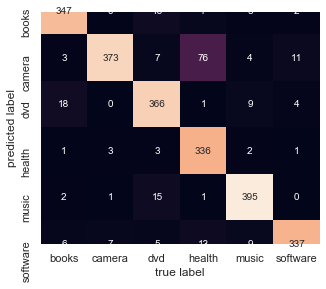

In [14]:
mat_v2 = confusion_matrix(test_labels_v2, labels_v2)
plt.figure(figsize=(5,5))

sns.heatmap(mat_v2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(train_labels_v2), yticklabels=np.unique(train_labels_v2))

plt.xlabel('true label'); plt.ylabel('predicted label')

# Given that my data is cutoff, I have decided to print the confusion matrix on its own

In [15]:
mat_v2.T

array([[347,   0,  15,   7,   3,   2],
       [  3, 373,   7,  76,   4,  11],
       [ 18,   0, 366,   1,   9,   4],
       [  1,   3,   3, 336,   2,   1],
       [  2,   1,  15,   1, 395,   0],
       [  6,   7,   5,  13,   9, 337]])

In [16]:
print('Microaveraged F1 score:', f1_score(test_labels_v2, labels_v2, average='micro'))
print('Macroaveraged F1 score:', f1_score(test_labels_v2, labels_v2, average='macro'))

Microaveraged F1 score: 0.9039026437263953
Macroaveraged F1 score: 0.9042775666100223
